# GAN(Generative Adversarial Network)

## 5.1 Discriminative vs. Generative
 - Discriminative Model : 이건지 저건지 구별할 수 있는 모델
  - 주어진 X에 대해서 y의 확률을 구하는 모형
  - 우리가 배운 대부분의 기계학습 모형
 - Generative Model 
  - X와 y의 결합확률분포를 구하는 모형
  - X를 '생성'할 수 있다

 - Discriminative: 그림을 보고 개와 고양이를 구별할 수 있다
  - “이 그림은 고양이일 확률이 높군” -> 고양이로 예측

 - Generative: 개와 고양이를 그릴 수 있다
  - “내가 고양이를 그린다면 이렇게 그리겠지” -> 고양이로 예측
  - 데이터 중 일부가 빠져도 상관없다. 스스로 그릴 수 있으므로 


## 5.2 Adversarial Example
 - Adversarial : 적대적인?
 - Nueral net을 파괴하기 위해서 만든 이론이다.

In [1]:
from IPython.display import Image

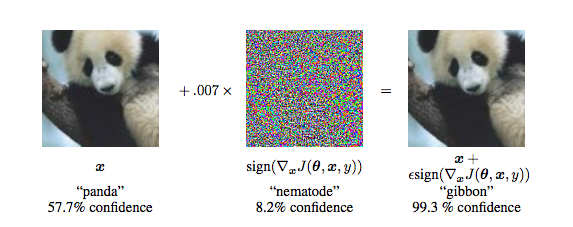

In [2]:
Image(filename="img/3.PNG")

 - 랜덤 Noise를 넣게 되면 원숭이로 인식하게 된다. => 조금만 데이터를 변경하더라도 인식하는데 힘들어진다.

## 5.3 Generative Adversarial Model
 - 두개의 모델을 동시에 학습.
 - 이 그림이 진짜인지 가짜인지 들어간다.
 - 진짜 데이터와 Generative Model에서 만든 가짜 데이터를 동시에 입력 
 - 서로 경쟁할 수 있게 모델을 생성하게 한다. 
 - 구별하는 모델을 통해 가짜를 진짜처럼 만들 수 있게 하는 모델이다. 

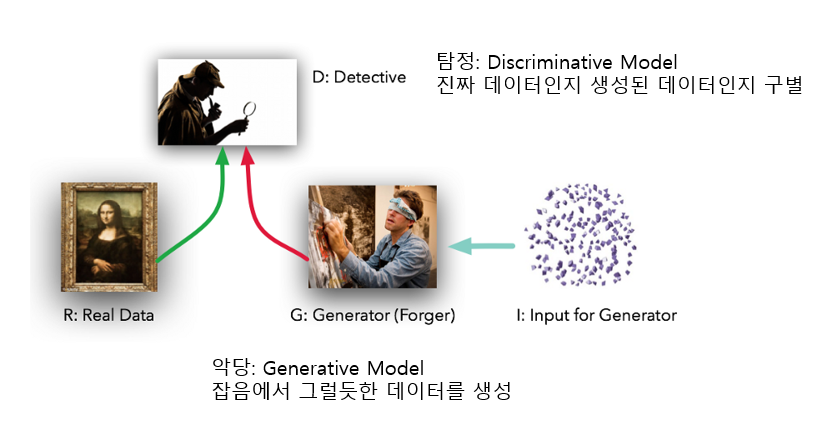

In [3]:
Image(filename="img/4.PNG")

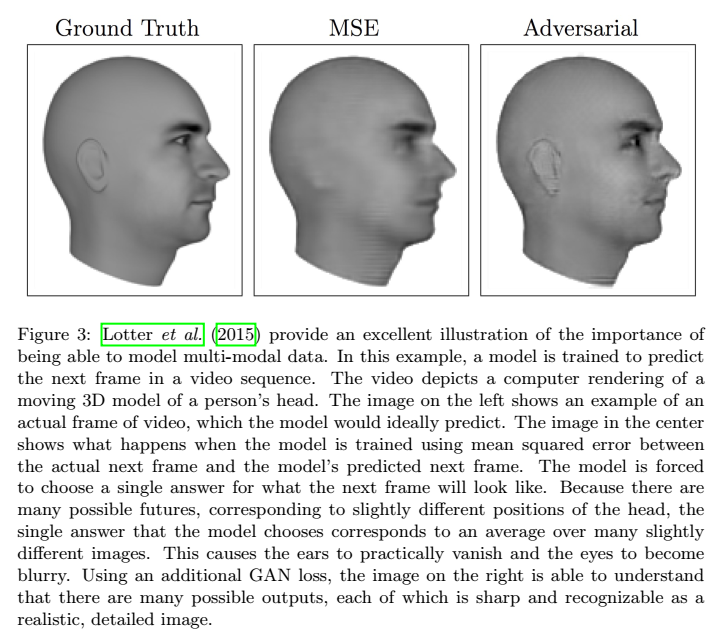

In [4]:
Image(filename="img/5.png")

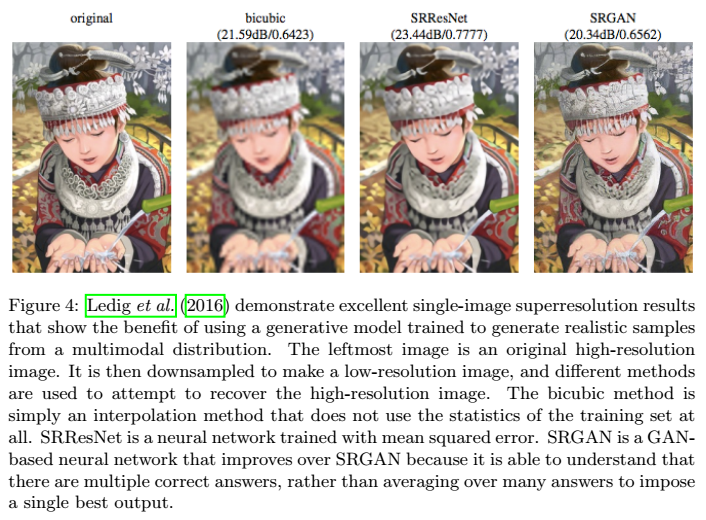

In [5]:
Image(filename="img/6.png")

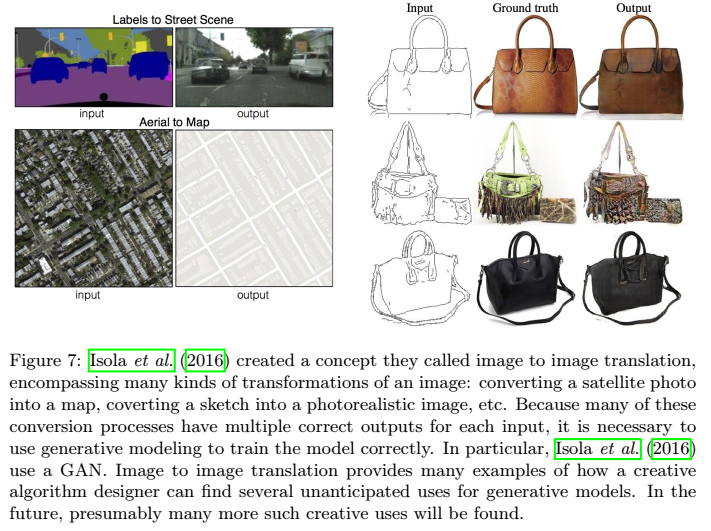

In [6]:
Image(filename="img/7.png")

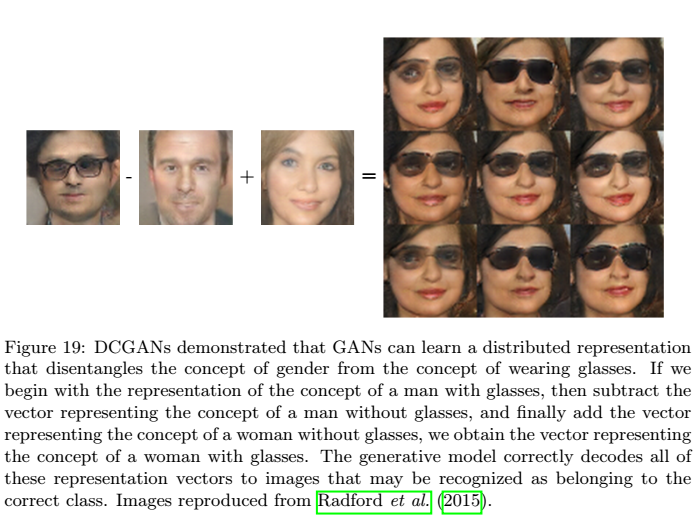

In [7]:
Image(filename="img/8.png")

## 5.4 문제점
 - GAN은 2014년에 첫 등장, 매우 빠르게 발전 중
 - Keras 에서 쉽게 하기는 조금 어려움 => 구조가 많이 다르기 때문에.
 - 학습이 잘 안되는 것으로 악명이 높음. 

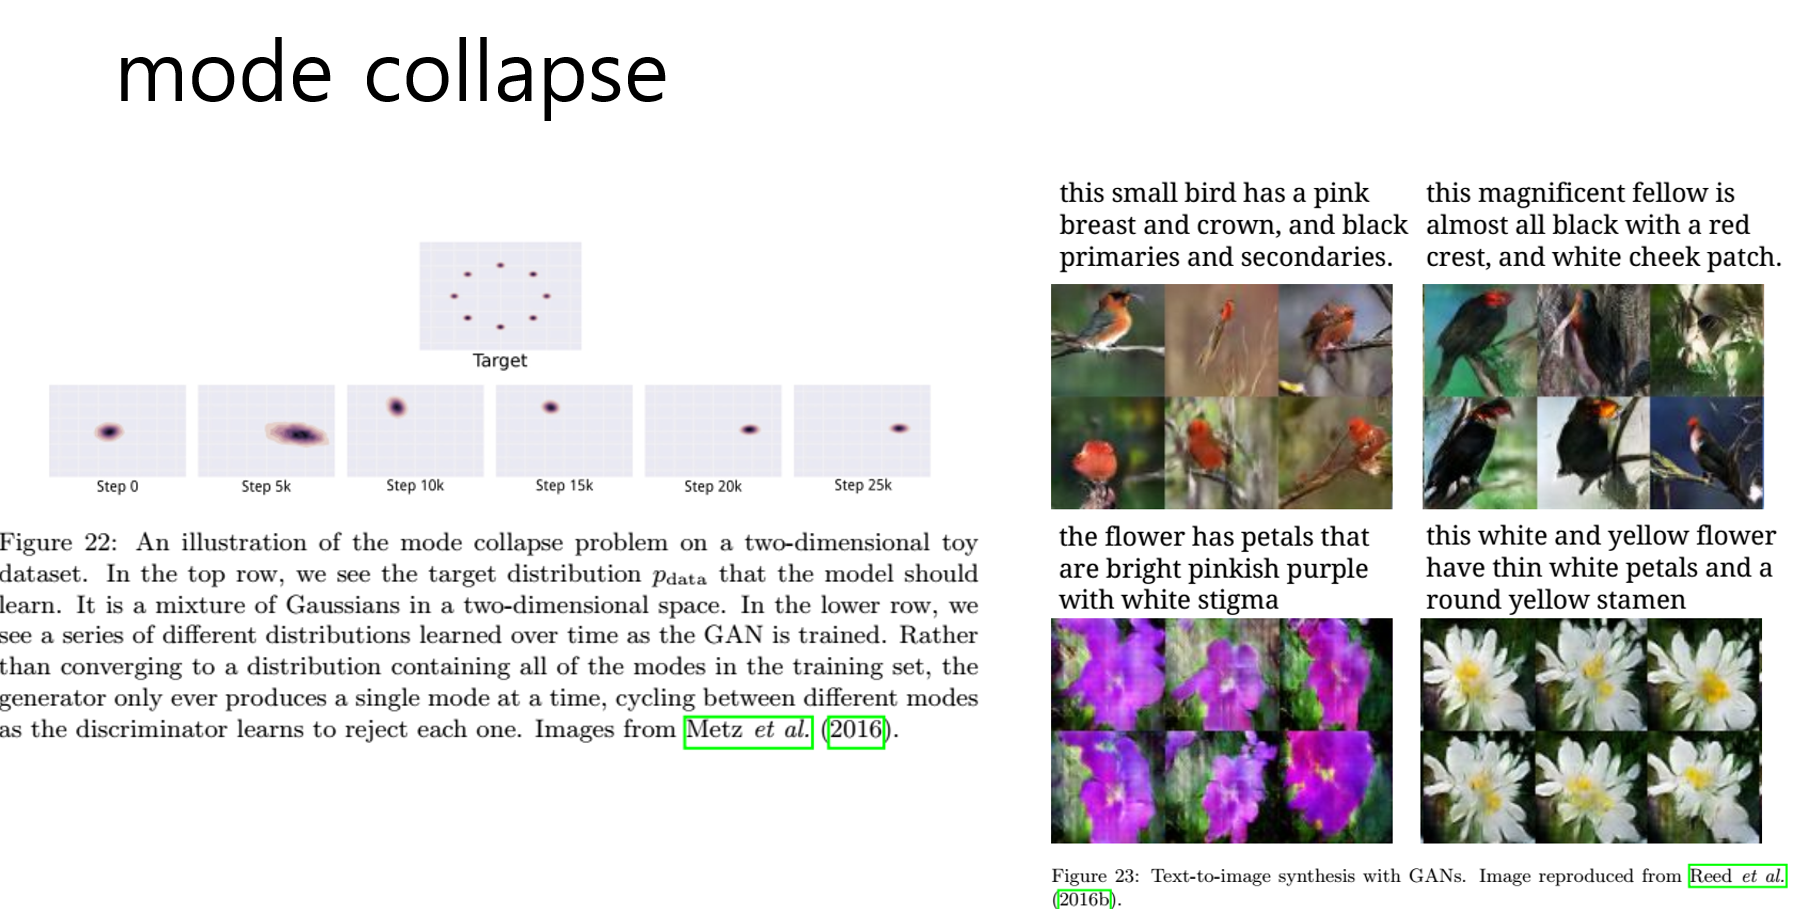

In [9]:
Image(filename="img/9.PNG")
# 실제 데이터는 고루 분포되어있는데. 속이는 애가 잘 속을 거같은 하나만 판다. 
# 예를들어 미켈란젤로 그림 전체를 그려서 속여야되는데 천지 창조 하나만 파서 그림을 그린다. 
# 텍스트를 주면 사진을 그려준다. 

# 실습 GAN
 - 아주 간단한 그림이다.
 - 왼쪽이 까맣고 오른쪽이 하얀색인 그림을 그린다.

In [10]:
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Reshape, UpSampling2D

Using TensorFlow backend.


In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
%matplotlib inline

## 아주 간단한 GAN
### 1. Generator

In [13]:
gen = Sequential()
gen.add(Dense(2, activation='sigmoid', input_shape= (1,)))
gen.compile(loss='binary_crossentropy', optimizer=Adam())
gen.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 4         
Total params: 4.0
Trainable params: 4
Non-trainable params: 0.0
_________________________________________________________________


## 2. 이미지 생성

In [16]:
noise = np.random.uniform(0, 1, size=(10, 1,))
fake = gen.predict(noise)
fake

array([[ 0.50015223,  0.50193495],
       [ 0.50552833,  0.56980383],
       [ 0.51021147,  0.62695712],
       [ 0.5036453 ,  0.5461973 ],
       [ 0.50444365,  0.5562371 ],
       [ 0.50795728,  0.59978151],
       [ 0.5075739 ,  0.5950923 ],
       [ 0.50137997,  0.51753074],
       [ 0.51327312,  0.66260284],
       [ 0.50710255,  0.58930469]], dtype=float32)

# 3. discriminator ( 탐정 ) 

In [17]:
disc = Sequential()
disc.add(Dense(1, activation='sigmoid', input_shape=(2,)))
disc.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
disc.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 3         
Total params: 3.0
Trainable params: 3
Non-trainable params: 0.0
_________________________________________________________________


## 4. Generative Adversarial Network

In [18]:
gan = Sequential()
gan.add(gen)

disc.trainable = False
for layer in disc.layers:
    layer.trainable = False 

gan.add(disc)
gan.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])
gan.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 2)                 4         
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 3         
Total params: 7.0
Trainable params: 4.0
Non-trainable params: 3.0
_________________________________________________________________


In [20]:
import tqdm

In [27]:
BATCH_SIZE = 128
EPOCH = 6000
disc_results = []
gan_results = []

for i in tqdm.tqdm_notebook(range(EPOCH)):
    # 진짜 이미지 뽑기 => 왼쪽데이터가 검정색인.
    real = np.zeros((BATCH_SIZE, 2))
    real[:, 0] = 1

    # 가짜 이미지 만들기 , 노이즈를 만들어서 generator에 넣는다. 
    noise = np.random.uniform(0, 1, size=(BATCH_SIZE, 1))
    fake = gen.predict(noise)

    # 데이터 만들기 두개를 합쳐서 하나의 데이터로 만든다.  앞부분은 진짜 뒷부분은 가짜
    X = np.concatenate((real, fake))
    y = np.zeros(2 * BATCH_SIZE) 
    y[:BATCH_SIZE] = 1  # REAL 위에는 진짜라고 표시 
    y[BATCH_SIZE:] = 0  # FAKE 아래에는 가짜라고 표시.

    # Discriminator 트레이닝
    d_res = disc.train_on_batch(X, y) # 한스탭만 학습.
    disc_results.append(d_res)
    #print('D', d_res)
    
    # 가짜 데이터를 진짜로 속임
    y_fake = np.ones(BATCH_SIZE) # fake에 1을 가지고 

    # Generator 트레이닝
    g_result = gan.train_on_batch(noise, y_fake)
    gan_results.append(g_result)
    #print('G', g_result)

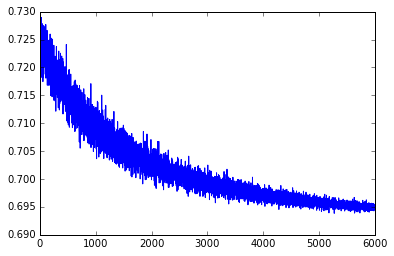

In [28]:
plt.plot(np.array(gan_results)[:,0]) # 떨어져야한다...

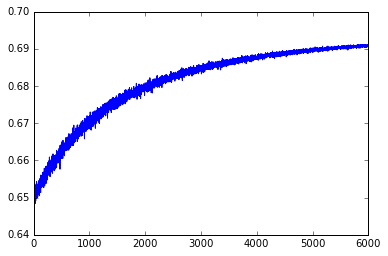

In [29]:
plt.plot(np.array(disc_results)[:,0]) # 높아져야한다.

In [30]:
fake

array([[  9.99704778e-01,   1.06664817e-03],
       [  9.96678352e-01,   6.63402583e-03],
       [  9.94865358e-01,   9.21126734e-03],
       [  9.98467147e-01,   3.70190456e-03],
       [  9.99714792e-01,   1.03937148e-03],
       [  9.97332335e-01,   5.62314223e-03],
       [  9.96809781e-01,   6.43516891e-03],
       [  9.98064697e-01,   4.41417284e-03],
       [  9.98360574e-01,   3.89456167e-03],
       [  9.99768913e-01,   8.86547088e-04],
       [  9.95855272e-01,   7.83860032e-03],
       [  9.99744594e-01,   9.56078933e-04],
       [  9.95160401e-01,   8.80970620e-03],
       [  9.99820530e-01,   7.32528162e-04],
       [  9.99780476e-01,   8.52686877e-04],
       [  9.99267995e-01,   2.11862498e-03],
       [  9.99279797e-01,   2.09279452e-03],
       [  9.99804676e-01,   7.80620787e-04],
       [  9.99748051e-01,   9.46511456e-04],
       [  9.99031663e-01,   2.61718291e-03],
       [  9.98822033e-01,   3.03469598e-03],
       [  9.99885082e-01,   5.22745773e-04],
       [  